

# Project: TMDb Data analysing

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description

The dataset under discussion is a comprehensive collection of data pertaining to a total of 10,000 films. This data has been meticulously gathered from a reputable source, The Movie Database (TMDb), which is widely recognized for its extensive and accurate movie-related information.

The dataset encompasses a wide array of details about each movie. Notably, it includes data on user ratings, providing valuable insights into the public reception and popularity of each film. These ratings, given by viewers, serve as a reliable measure of a movie’s success and appeal among its audience.

In addition to user ratings, the dataset also includes information on the revenue generated by each movie. This financial data is crucial as it offers a quantifiable measure of a movie’s commercial success. By comparing the revenue data with user ratings, one can draw meaningful conclusions about the correlation between a movie’s financial success and its popularity among viewers.

In summary, this dataset serves as a rich resource for anyone seeking to conduct in-depth analysis or research in the field of film studies, providing both critical (user ratings) and commercial (revenue) perspectives on a substantial number of movies.

### Question(s) for Analysis
>

1.   ***When to release new movies? (months)***
2.   ***The characteristics of a profitable movie***    
       *   Does higher budget correlate into higher profit?
       *   Does the popularity of a movie translates into greater revenue?

3.   ***Top actors based on the number appearances***
      *   based solely on the number of appearances
      *   very profitable movies 1B$+


4.   ***Top ten most profitable movies***
      * By the actual revenue  
      * By the revenue adjusted for inflation
5.  ***What is the dominating genre every decade?***

      *   according to popularity




In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress Warning messages
warnings.filterwarnings('ignore')



In [2]:
# Upgrade pandas to use dataframe.explode() function.
!pip install --upgrade pandas==0.25.0;

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 22.6 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


<a id='wrangling'></a>
## Data Wrangling

>  In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.





### General Properties


In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('/content/tmdb-movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
##### Basic data wrangling #####
df.shape

(10866, 21)

From what we gathered we now know that the data set contains 10866 rows (movies) and 21 columns.... now we check for **duplicates**

###Data Assesing

In [5]:
##### Checking for duplicates #####
df.duplicated().sum()


1

In [6]:
##### Checking the Number of unique ids in case of duplicated data  #####
df['id'].nunique()



10865

**With the exception of the duplicate row, which we will remove throughout the data cleaning process, 10856 of 10866 are unique values, indicating that the data set is largely ready for use.**

In [7]:
##### Gathering more information about the data set #####
##### specificly looking for missing data #####
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

You can see that there are about four columns that have a large amount of missing data; we will remove them as well as any unnecessary columns later on. while the remaining columns are being cleaned.

**The columns which are going get dropped** :
*   tagline
*   production_companies
*   homepage
*   keywords
*   imdb_id
*   overview






In [8]:
###### some basic statistics ######
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Upon using the describe function, it is evident that our dataset contains several columns populated with zero values. As this is done, our subsequent step will be to determine the quantity of missing rows in the each of these columns.

In [9]:
##### Checking for the number of missing rows #####
(df == 0).sum()

id                         0
imdb_id                    0
popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                       0
homepage                   0
director                   0
tagline                    0
keywords                   0
overview                   0
runtime                   31
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

As observed, over 50% of the rows in the ‘budget’ and ‘revenue’ columns are missing. However, we have decided to retain these rows as is. Filling these missing values with the mean or median will significantly compromise the dataset’s accuracy. Similarly, eliminating these rows would result in the loss of half the dataset, which could impact our overall analysis. Instead, we will address these missing values individually as and when required during our analysis. This approach ensures that we maintain the integrity of our dataset while also allowing for flexibility in our data handling strategy.


### Data Cleaning
> #### In this section of the analysis, we will address and resolve the various issues that we discovered throughout the data exploration phase such as:


*   Removing duplicated rows
*   Droping missing and useless columns to tidy up the dataframe while also dealing with NA rows (aka missing rows)
*   Converting the datatype of the release_date column from int64 to datetime
*    Dealing with the pipe character seprating each of the values in the cast and genre columns







In [10]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
##### First removing the duplicated rows######
df.drop_duplicates(inplace = True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date          10

In [11]:
##### Removing incomplete and useless columns #####
df.drop(['imdb_id','homepage','tagline','overview','production_companies','keywords'],axis =1,inplace = True)
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10731 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10731 non-null  int64  
 1   popularity      10731 non-null  float64
 2   budget          10731 non-null  int64  
 3   revenue         10731 non-null  int64  
 4   original_title  10731 non-null  object 
 5   cast            10731 non-null  object 
 6   director        10731 non-null  object 
 7   runtime         10731 non-null  int64  
 8   genres          10731 non-null  object 
 9   release_date    10731 non-null  object 
 10  vote_count      10731 non-null  int64  
 11  vote_average    10731 non-null  float64
 12  release_year    10731 non-null  int64  
 13  budget_adj      10731 non-null  float64
 14  revenue_adj     10731 non-null  float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.3+ MB


In [12]:
##### converting release_date into datetime as its crucial for our EDA #####
df['release_date']=pd.to_datetime(df['release_date'])
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [13]:
##### creating a net_profit column ######
df['net_profit'] = df['revenue'] - df['budget']
df['adj_net_profit'] = df['revenue_adj'] - df['budget_adj']
df.head()


,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_profit,adj_net_profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,1.254446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354,2.101614e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201,1.704191e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225,1.718723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360,1.210949e+09


In [14]:

###### Creating a function to  copy the dataframe then split and explode the desired column#####
def split_ex( dfx,columnx):
  dfx[columnx] = dfx[columnx].str.split('|')
  dfx = dfx.explode(columnx)
  return dfx


**This function is designed to remove the pipe character. It accepts two parameters: dfx and columnx. The dfx parameter represents a a new DataFrame that is a copy of the original DataFrame. The columnx parameter specifies the column in the new DataFrame that the function will process i.e. removing the pipe character**

NOTE: Duplicating the dataframe is a crucial procedure to ensure the integrity of our data throughout the analysis. This step becomes particularly significant when we perform operations such as splitting and exploding the ‘genres’ and ‘cast’ columns. Each split value is allocated its own row, a process which  substantially influence the precision of our analysis. Therefore, by working with multiple copies of the dataframe, we safeguard our original data, ensuring its accuracy remains uncompromised for subsequent analytical tasks.

In [15]:
###### removing the pipe character #######
###### dealing with the cast column ######
df1 = df.copy(deep=True)
df1 = split_ex(df1 ,'cast')
df1.head()



,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_profit,adj_net_profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,1.254446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Bryce Dallas Howard,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,1.254446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Irrfan Khan,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,1.254446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Vincent D'Onofrio,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,1.254446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Nick Robinson,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,1.254446e+09


In [16]:
###### removing the pipe character #######
###### dealing with the genres column ######
df2 = df.copy(deep=True)
df2 = split_ex(df2,'genres' )
df2.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_profit,adj_net_profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,1.254446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,1.254446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Science Fiction,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,1.254446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,1.254446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354,2.101614e+08


We now turn our attention to the next critical segment of our report, the Exploratory Data Analysis.

<a id='eda'></a>
## Exploratory Data Analysis
####Having meticulously cleaned and trimmed the dataset, the next phase involves exploratory data analysis. This process will entail the computation of relevant statistics and the creation of visualizations, all aimed at addressing the research questions asked in the Introduction section.






####Research question 1: What is the best to time to release movies?
To determine the months with the highest frequency of movie releases, we initially need to extract the month information from the release_date column (This necessitated the conversion of the release_date column’s datatype during the data cleaning phase.) We then employ the dt.month function to extract the month from each date Subsequently, we count the number of movies released in each month. This process enables us to identify the top 3 months per movie releases based on the available data.

In [17]:
###### Creating a new dataframe in which the net profit is greater as to filter out failed movies #####
###### Creating a new column which has the number of releases per month ######
df_profit = df[df['net_profit'] > 0]
num_of_releases = df_profit['release_date'].dt.month.value_counts().sort_index()



**In the new dataframe, a new column has been introduced which represents the months of the year in numerical format, with January represented as ‘1’, February as ‘2’, and so forth. This column also includes the corresponding count of movies released in each respective month.
The next step is to replace these numerical values with abbreviated month names to enhance readability in visualizations.**


In [18]:
##### converting the months' numuric value into an abbreviated str value  ######
##### Creating the new dataframe #####

months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
##### Creating the new dataframe #####
num_of_releases = pd.DataFrame(num_of_releases)
num_of_releases['month'] = months
#####change the column name of the new dataframe 'number_of_release'######
num_of_releases.rename(columns = {'count':'number_of_releases'},inplace=True)
num_of_releases.head()


,number_of_releases,month
release_date,,
1,225,Jan
2,242,Feb
3,298,Mar
4,270,Apr
5,302,May


Now that the data is prepared, we’ll use Seaborn to create a bar plot for visualizing the distribution of movie releases by month.

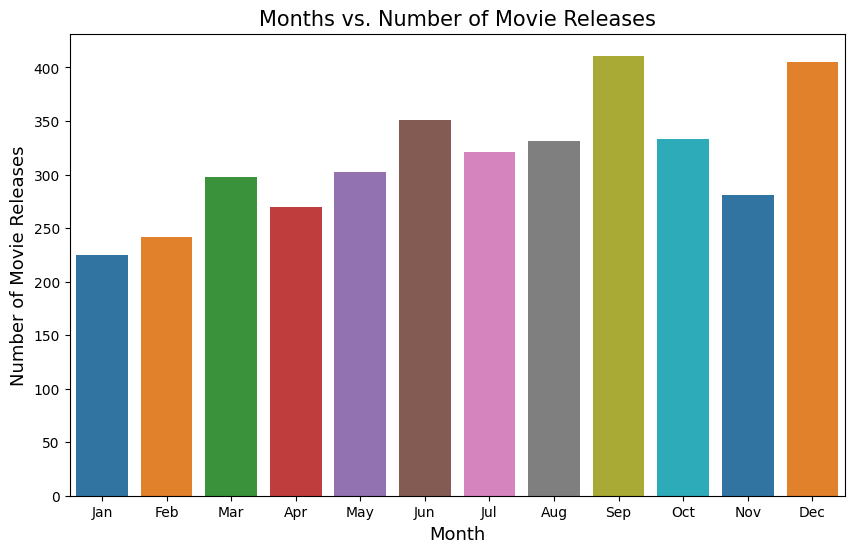

In [19]:
plt.figure(figsize=(10, 6));
# Create the bar plot using Seaborn
sns.barplot(x="month",y='number_of_releases', data= num_of_releases , palette="tab10" );

# Set the plot title, axis labels, and font sizes
plt.title("Months vs. Number of Movie Releases", fontsize=15);
plt.xlabel("Month", fontsize=13);
plt.ylabel("Number of Movie Releases", fontsize=13);

# Show the plot
plt.show();

**Based on the visual representation provided by the graph, we can deduce that the optimal periods for movie releases appear to be in September or December, With June following closely.
This is logical as these months are either holiday seasons or back-to-school period or Summer break,potentially leading to increased viewership.**

### Research question 2.1: Top actors based on the number of appeareances

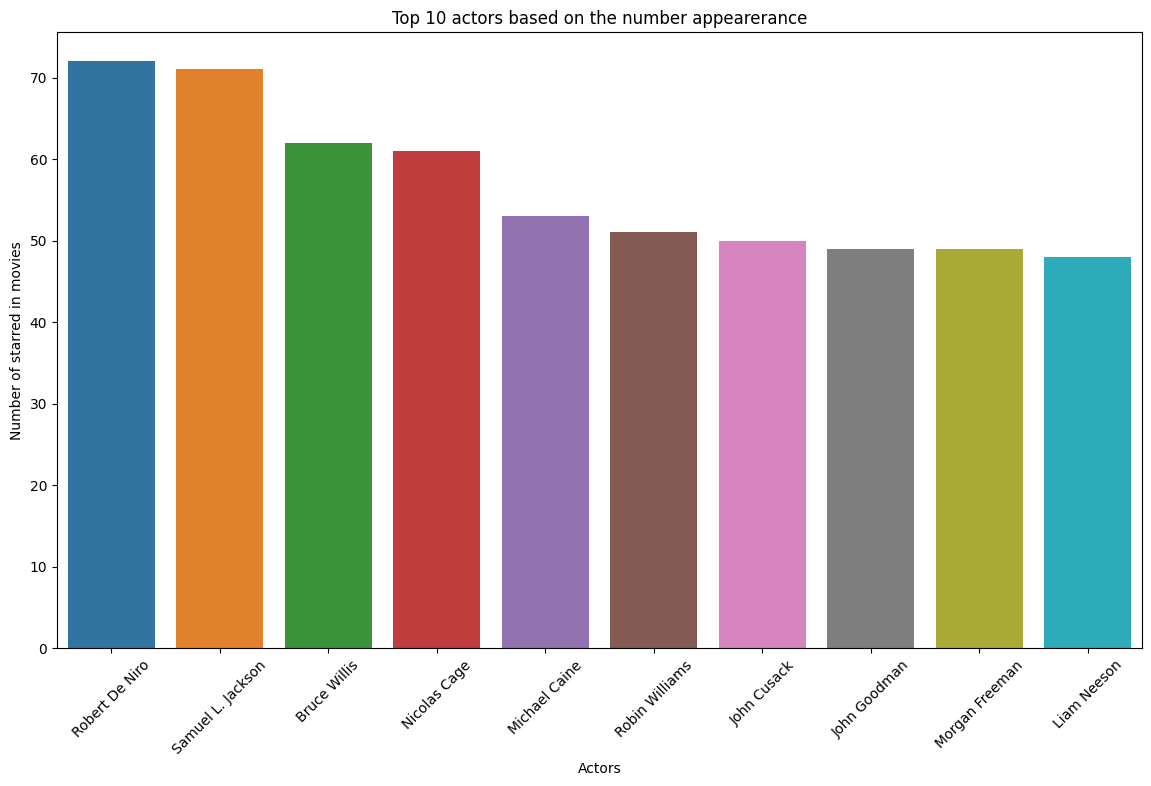

In [20]:
# Get the top 10 actor by the number of appearance
top_actors = df1['cast'].value_counts().head(n=10)

# Create the bar plot using Seaborn
plt.figure(figsize=(14, 8))
sns.barplot(x=top_actors.index, y=top_actors.values, palette="tab10")

# Add labels and title
plt.xlabel("Actors")
plt.ylabel("Number of starred in movies")
plt.title("Top 10 actors based on the number appearerance")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

**The plot above provides a clear representation of the most prolific actors, determined by the number of movies they have starred in. This allows us to identify key figures in the film industry based on their extensive filmography. now let's see how this compares with actors starred in a list of the top 100 movie based on revenue**

### Research question 2.2: Top actors starred in very successful movies
**Now, we’ll compare our earlier findings with a list of actors who have appeared in the top 100  movies. This will help us see if there are any common actors or differences between the two lists. This comparison can give us more insight into the impact of these actors on a movie’s financial success.**

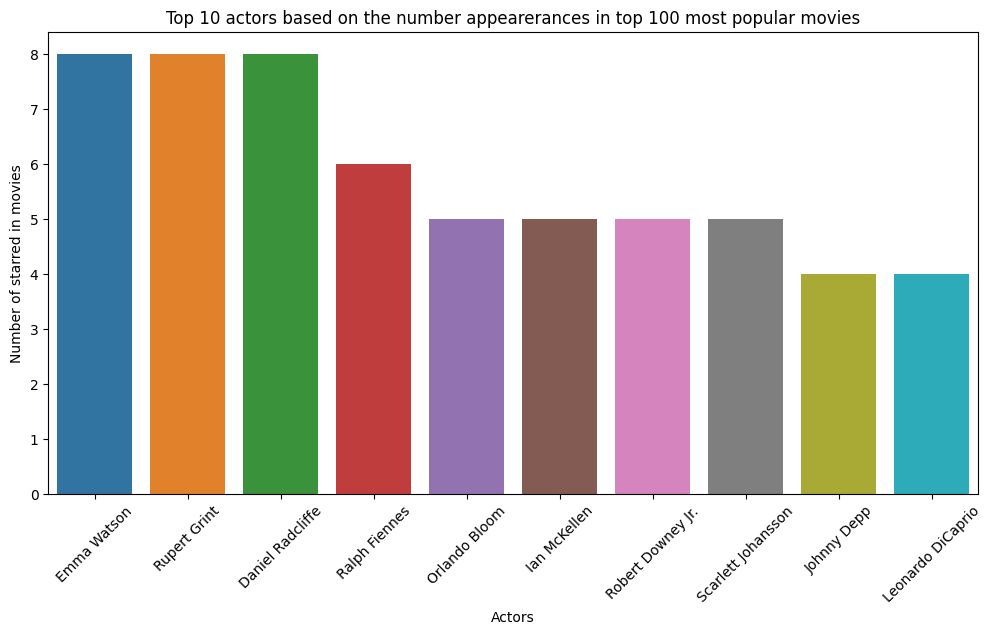

In [21]:
###### Creating dataframe of the top 100 movies based on the popularity ######

dfx = df1.sort_values(by='popularity', ascending=False).head(500)

# Get the top 10 actor by the number of appearance in the top 100 movies
top_actors = dfx['cast'].value_counts().head(n=10)

# Create the bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=top_actors.index, y=top_actors.values, palette="tab10")

# Add labels and title
plt.xlabel("Actors")
plt.ylabel("Number of starred in movies")
plt.title("Top 10 actors based on the number appearerances in top 100 most popular movies")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show();


**The new graph significantly diverges from the previous one, indicating no apparent similarities.**

NOTE: As the ‘cast’ column is exploded, each movie is replicated according to the number of cast members (5 times). This results in a larger dataset. Therefore, sorting was performed on 500 movies instead of the original 100 to ensure all variations were considered. This approach provides a more comprehensive and accurate analysis.

###The characteristcs of a profitable movie:
###Research question 3.1: The relation between the budget and the revenue

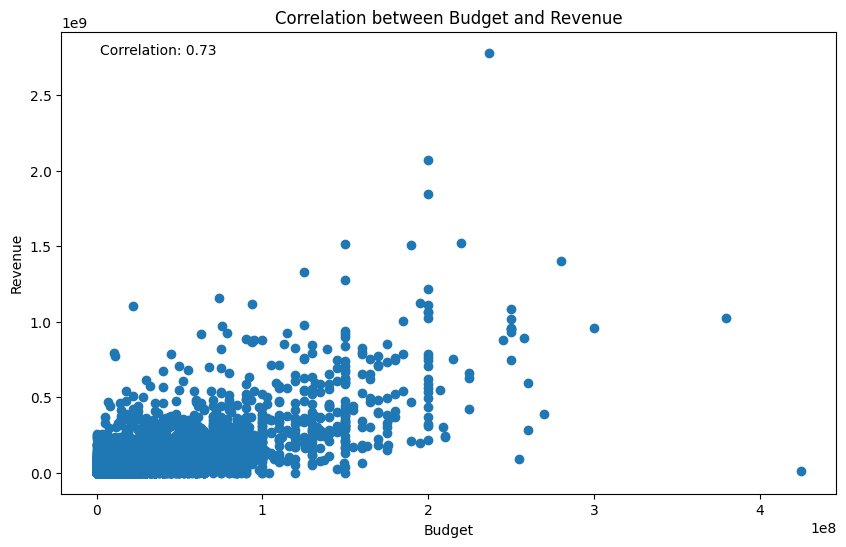

In [22]:

plt.figure(figsize=(10, 6))
# Plot the scatter plot.
plt.scatter(df["budget"], df["revenue"])
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.title("Correlation between Budget and Revenue")

# Calculate the correlation coefficient.
correlation = df["budget"].corr(df["revenue"])

# Add the correlation coefficient to the plot.
plt.annotate(f"Correlation: {correlation:.2f}", xy=(0.05, 0.95), xycoords="axes fraction")

# Show the plot.
plt.show()

The scatter plot above illustrates a strong positive correlation between the budget and revenue of movies. This suggests that a substantial budget can often lead to higher revenue, making it a recommended strategy for producing a profitable film. However, it’s important to note that a high budget is not a prerequisite for success. There are numerous instances of low-budget films that have generated significant revenue, demonstrating that other factors can also contribute to a movie’s profitability.

###Research question 3.2: The relation between the budget and the popularity

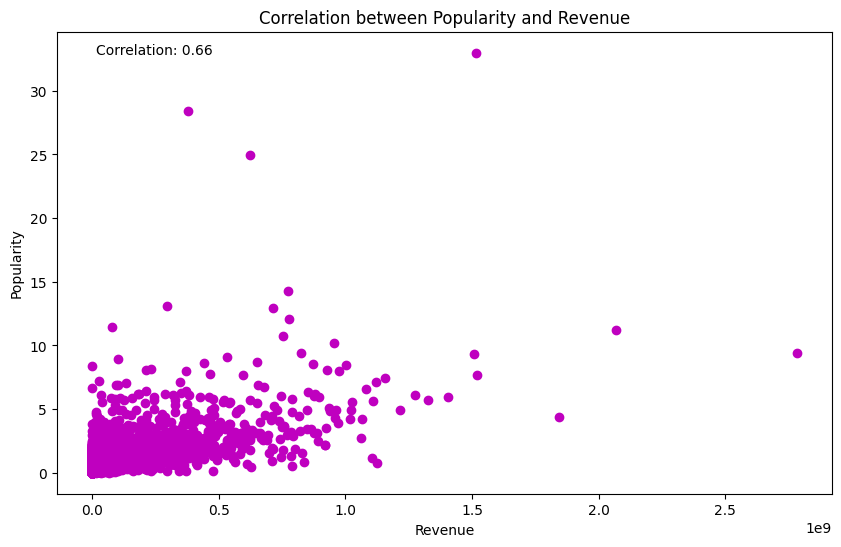

In [23]:
plt.figure(figsize=(10, 6))
# Plot the scatter plot.
plt.scatter(df["revenue"], df["popularity"],color = 'm')
plt.xlabel("Revenue")
plt.ylabel("Popularity")
plt.title("Correlation between Popularity and Revenue")

# Calculate the correlation coefficient.
correlation = df["revenue"].corr(df["popularity"])

# Add the correlation coefficient to the plot.
plt.annotate(f"Correlation: {correlation:.2f}", xy=(0.05, 0.95), xycoords="axes fraction")

# Show the plot.
plt.show()

The scatter plot above reveals a robust positive correlation between a movie’s popularity and its revenue. This indicates that the popularity of a movie, which can be influenced by factors such as a well-known cast and effective marketing strategies, plays a significant role in its financial success. Therefore, investing in high-profile talent and marketing can be a strategic move towards producing a profitable film. However, it’s also important to note that these are not the only determinants of success, and various other factors can contribute to a movie’s profitability.

### Research Question 4:Top ten most profitable movies

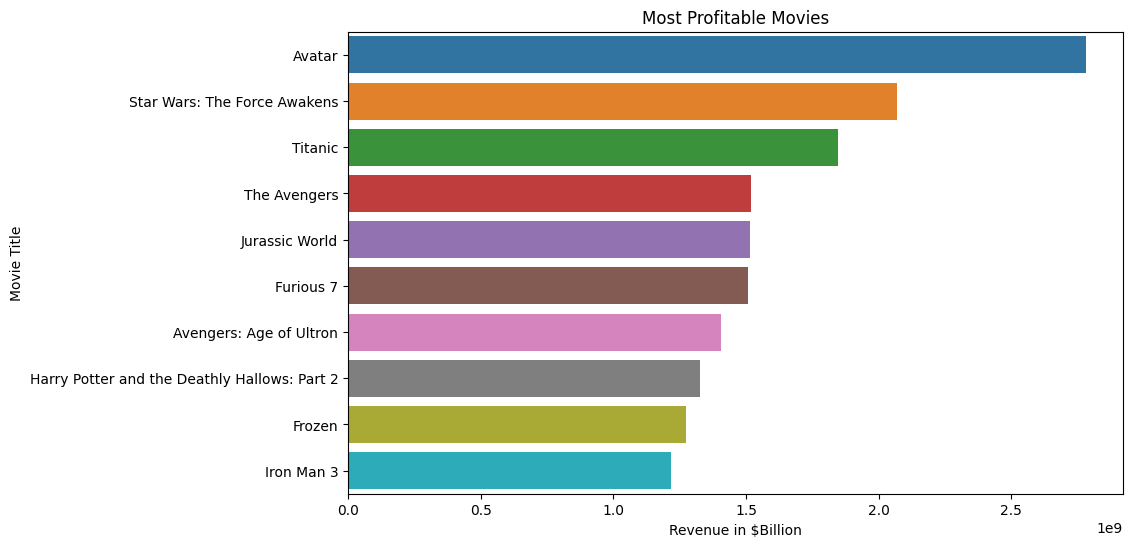

In [24]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df_sorted = df.sort_values("revenue", ascending=False)
plt.figure(figsize=(10, 6))
# Extracting the top 10 most profitable movies
top_movies = df_sorted.head(10)

# Creating a bar plot with movie titles on the x-axis and revenue on the y-axis
sns.barplot(x="revenue", y="original_title", data=top_movies, palette = 'tab10')

# Set the title and axis labels
plt.title("Most Profitable Movies")
plt.xlabel("Revenue in $Billion")
plt.ylabel("Movie Title")

plt.show()

In [25]:
###### Dividing years into decades to facilitate plotting ######
bins_edges=[1960,1970,1980,1990,2000,2010,2015]
bins_names=['1960s','1970s','1980s','1990s','2000s','2010s']
df2.release_year = pd.cut(df.release_year, bins_edges, labels = bins_names)


In [26]:
###### Grouping the DataFrame by year and genre, and counting the number of movies ######
grouped_df = df2.groupby(["release_year", "genres"])["original_title"].count()

###### Unstacking the DataFrame to create a table that has each genre with the corresponding release year ######
unstacked_df = grouped_df.unstack(level=1).fillna(0)
unstacked_df.head()


genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1960s,81,65,16,116,45,5,173,39,24,9,29,45,23,35,67,34,3,63,34,38
1970s,137,85,15,134,88,10,251,39,34,4,25,115,25,62,54,85,8,168,22,33
1980s,283,183,36,451,174,13,449,109,128,7,31,231,49,77,185,179,9,281,32,11
1990s,463,280,99,785,271,23,902,294,196,35,53,184,57,148,369,217,19,512,32,24
2000s,836,535,307,1421,484,162,1717,485,339,109,123,540,115,299,669,388,58,1042,89,30


The new DataFrame shows the number of produced movies from each genre that came out in each decade. Now let's start plotting

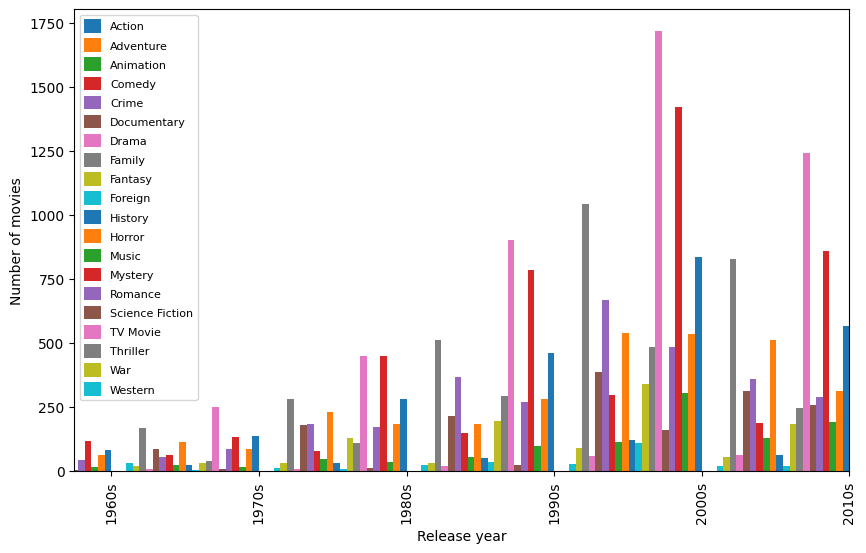

In [27]:
###### Creating the plot ######
fig, ax = plt.subplots(figsize=(10,6))
# using the groupby function the get the desired result
unstacked_df.plot(kind='bar',ax=ax,width=-.9,align='edge');
ax.set_ylabel('Number of movies');
ax.set_xlabel('Release year');
ax.legend(handlelength=1.5, handleheight=1.5, fontsize=8)

#### From this plot, as you can see, we can determine the top 3 genres based on the number of produced movies from each decade.





  1960s: Adventure, Action, Comedy.

  1970s: Drama, Action, Horror, comedy.

  1980s: Comedy, Drama, Action.

  1990s: Drama, Comedy, Action.

  2000s: Drama, Comedy, Action.

  2010s: Drama, Comedy, Action





##Data limitations


*   Our dataset exhibits a notable prevalence of zero values, particularly within the ‘budget’ and ‘revenue’ columns. This pattern suggests a significant proportion of missing data, with over 50% of the rows are missing, which as i previously mentioned whether filling in the mean or simply removing them would greatly hurt the analysis.
*   The dataset in question, dating back to 2015, may not reflect the most current trends and information and we are not quite sure of the accuracy of it's data





[<a id='conclusions'></a>](https://)

## Conclusions


After careful inspection, extensive cleaning, and rigorous analysis of the dataset, we have answered and visualized the questions posed in the first section. Ensuring the integrity and trustworthiness of our findings through this method has guaranteed the accuracy and consistency of our conclusions.



***Now to summarize our EDA findings:***


 * The timing of movie releases, as evidenced by the exploratory data analysis, is crucial. Strategically scheduling releases during holidays, back-to-school periods, and summer breaks can capitalize on increased viewership opportunities, as these periods typically see heightened audience availability and engagement.
 * The presence of a renowned cast coupled with effective marketing strategies is instrumental in driving higher profit margins.
 * The budget vs revenue scatter plot confirms a strong positive correlation between a movie’s budget and its revenue, indicating that higher investment often translates to greater earnings. However, this is not a strict rule, as films with modest budgets can also achieve profitability, highlighting the role of additional factors in a movie’s financial performance.
 * The popularity vs revenue indicates a strong positive correlation between movie popularity and revenue, suggesting that films with high-profile casts and robust marketing campaigns tend to perform better financially. While these elements are influential, they are not the sole predictors of success, as various other factors also play a role in a movie’s profitability.


 * The analysis reveals that Drama, Comedy, and Action are the top three most produced movie genres over the past three decades, highlighting prevailing production trends and audience preferences in the film industry.

In [28]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255